In [1]:
import os
import numpy as np
import pandas as pd
import scipy as scp
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.lines import Line2D

# 
import auditory_cortex.analysis.config as config
import auditory_cortex.helpers as helpers
import auditory_cortex.analysis.analysis as analysis
from utils_jgm.tikz_pgf_helpers import tpl_save

saved_results = '../../../saved_results/'



### merging multiple files...

In [3]:
def merge_correlation_results(model_name, file_identifiers, idx):
    """
    Args:

        model_name: Name of the pre-trained network
        file_identifiers: List of filename identifiers 
        idx:    id of the file identifier to use for saving the merged results
    """
    results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'

    corr_dfs = []
    for identifier in file_identifiers:
        filename = f"{model_name}_{identifier}_corr_results.csv"
        file_path = os.path.join(results_dir, filename)

        corr_dfs.append(pd.read_csv(file_path))

        # remove the file
        os.remove(file_path)

    # save the merged results at the very first filename...
    output_identifer = file_identifiers[idx]    
    filename = f"{model_name}_{output_identifer}_corr_results.csv"
    file_path = os.path.join(results_dir, filename)

    data = pd.concat(corr_dfs)
    data.to_csv(file_path, index=False)
    print(f"Output saved at: \n {file_path}")



In [4]:
model_name = 'wave2letter_modified'
# model_name = 'wave2vec2'
# model_name = 'speech2text'
file_identifiers = ['opt_delay_L6_D0',
                    'opt_delay_L6_D1',
                    'opt_delay_L6_D2',
                    'opt_delay_L6_D3',
                    'opt_delay_L6_D4'
                    ]
out_file_id = 0
# file_identifiers = ['opt_delay_with_audio_zeropad',
#                     'opt_delay_with_audio_zeropad_l8-9',
#                     'opt_delay_with_audio_zeropad_l10-11'
#                     ]
merge_correlation_results(model_name, file_identifiers, out_file_id)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations/wave2letter_modified_opt_delay_L6_D0_corr_results.csv


In [5]:
# model_name = 'wave2letter_modified'
identifer = file_identifiers[out_file_id]

# loading file1
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_{identifer}_corr_results.csv"
file_path = os.path.join(results_dir, filename)
data = pd.read_csv(file_path)
print(f"file_path: {file_path}")
data['layer'].unique()



file_path: /depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations/wave2letter_modified_opt_delay_L6_D0_corr_results.csv


array([1., 2., 3., 4.])

In [33]:
# os.remove(file_path)

### analyzing STRF model

In [2]:
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
csv_file_name = 'STRF_corr_results.csv'
# CSV file to save the results at
# file_exists = False
file_path = os.path.join(results_dir, csv_file_name)

corr = pd.read_csv(file_path)

In [44]:
len(corr['session'].unique())

45

In [64]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

In [65]:
filename = 'STRF_corr_RidgeCV.npy'
path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
baseline_corr = np.load(path)

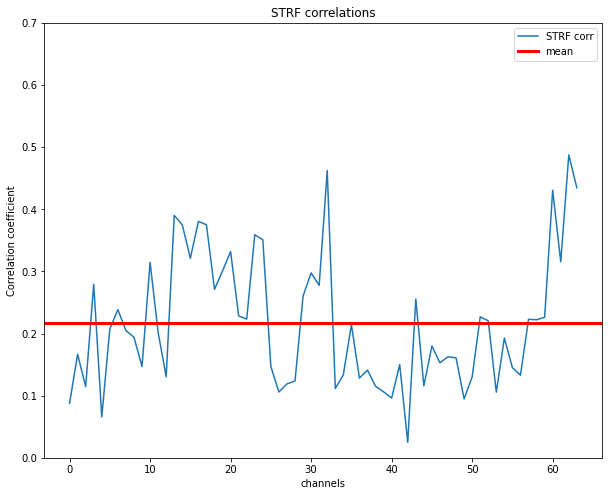

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [3]:
filename = 'STRF_corr_elasticNetCV.npy'
path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
baseline_corr = np.load(path)

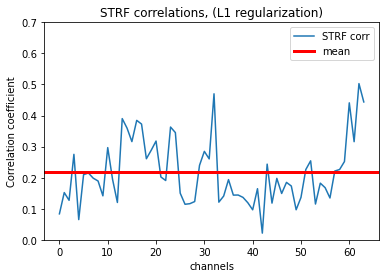

In [17]:
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations, (L1 regularization)")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [5]:
np.mean(baseline_corr)

0.2169307859864385

### analyzing whisper

In [6]:
# model_name = 'whisper'
# model_name = 'deepspeech2'
# model_name = 'wave2vec2'

# model_name = 'deepspeech2_rnn_2nd_half'
# model_name = 'wave2letter_modified_E8'

# model_name = 'wave2letter_modified_opt_delays_l8-9'

# model_name = 'wave2vec2'
# id = 'opt_delay'
# id = 'opt_delay_feature_extractor'

# model_name = 'deepspeech2'

model_name = 'speech2text'
id = 'opt_delay'



model_name += '_' + id

results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

In [7]:
len(corr_obj.get_all_sessions())

45

In [33]:
corr_obj.data['layer'].unique()

array([1.])

In [22]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,normalized_test_cc
0,180420.0,1.0,0.0,20.0,0.0,0.0,0.014079,-0.006855,499.0,25.0,-2.053949
1,180420.0,1.0,1.0,20.0,0.0,0.0,0.014154,-0.023385,499.0,25.0,-0.605236
2,180420.0,1.0,2.0,20.0,0.0,0.0,0.012941,-0.023196,499.0,25.0,-0.557875
3,180420.0,1.0,3.0,20.0,0.0,0.0,0.008833,-0.024372,499.0,25.0,-0.362400
4,180420.0,1.0,4.0,20.0,0.0,0.0,0.008828,-0.023253,499.0,25.0,-0.379626
...,...,...,...,...,...,...,...,...,...,...,...
1723,190801.0,1.0,59.0,20.0,0.0,0.0,0.004650,-0.018845,499.0,10.0,-0.246781
1724,190801.0,1.0,60.0,20.0,0.0,0.0,0.022409,-0.007219,499.0,30.0,-3.104087
1725,190801.0,1.0,61.0,20.0,0.0,0.0,0.019608,-0.008979,499.0,10.0,-2.183818
1726,190801.0,1.0,62.0,20.0,0.0,0.0,0.016287,-0.003337,499.0,30.0,-4.880047


0.10639355370350263


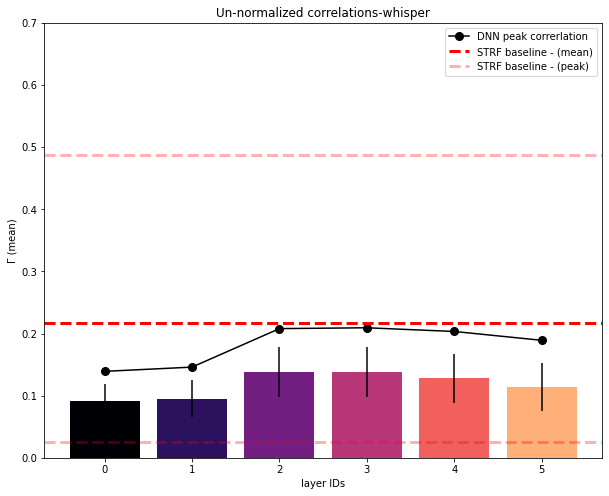

In [9]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing wav2vec2

0.10639355370350263


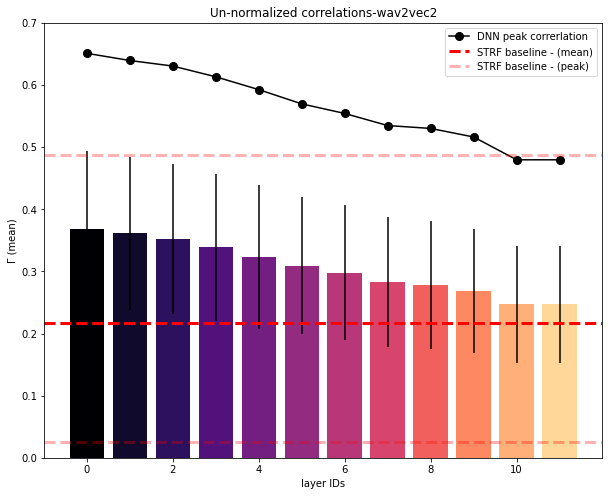

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [4]:
model_name = 'wave2vec2'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


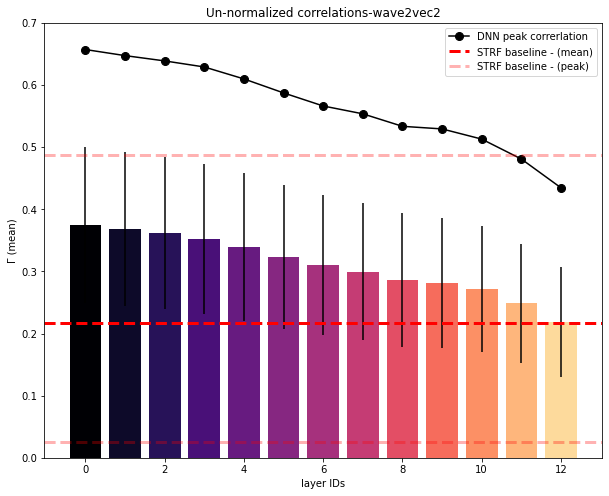

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing S2T

In [16]:
model_name = 'speech2text'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
# filename = 'speech2text_testing_for_modified_code.csv'
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


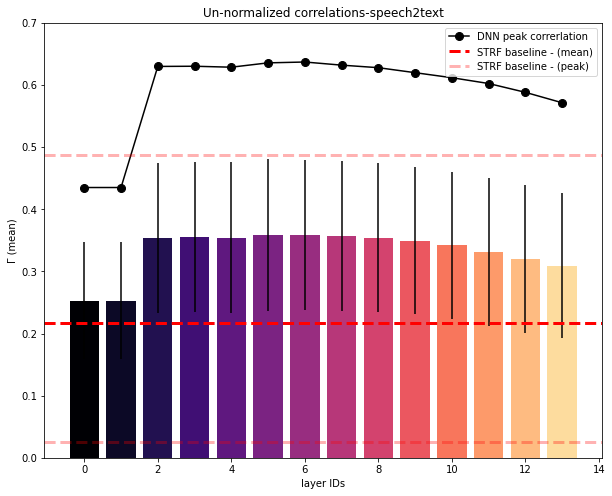

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing W2L (modified)

In [21]:
corr_obj = analysis.correlations()

0.10639355370350263


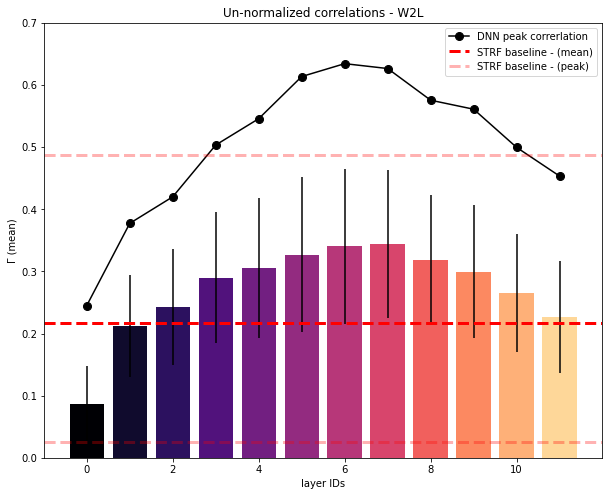

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title("Un-normalized correlations - W2L")
plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')
# plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_unnormalized.svg'))
# saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'correlations_plot_unnormalized.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )
# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### w2l original 

In [19]:
model_name = 'w2l_original'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


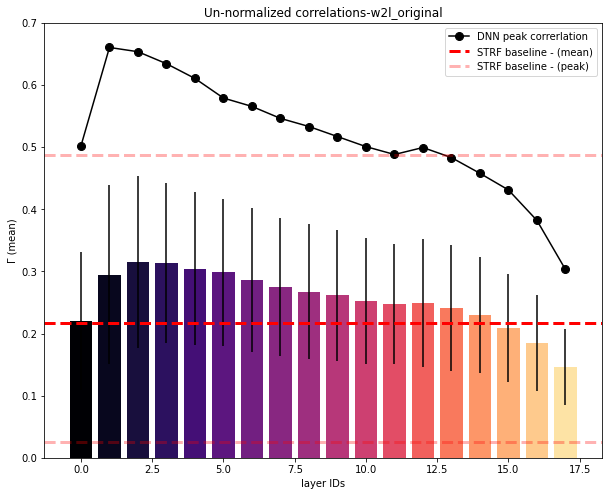

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### S2T initial

In [62]:
model_name = 'speech2text_initial'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


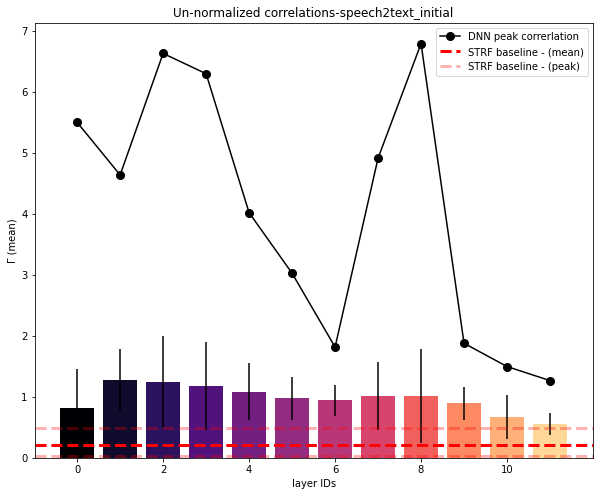

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'normalized_test_cc'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=40,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 0.8])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [54]:
corr_obj.data

,Unnamed: 0,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents,normalized_test_cc
0,0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,1.0,500.0,0.117389
1,1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960,1.0,500.0,0.098954
2,2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076,1.0,500.0,0.109768
3,3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360,1.0,500.0,0.203166
4,4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559,1.0,500.0,0.096143
...,...,...,...,...,...,...,...,...,...,...,...,...
18427,18427,200206.0,11.0,59.0,160.0,50.0,0.401246,0.253985,0.258061,1.0,500.0,0.253985
18428,18428,200206.0,11.0,60.0,160.0,50.0,0.513357,0.429350,0.415336,1.0,500.0,0.429350
18429,18429,200206.0,11.0,61.0,160.0,50.0,0.452517,0.362935,0.337969,1.0,500.0,0.362935
18430,18430,200206.0,11.0,62.0,160.0,50.0,0.509439,0.446424,0.413667,1.0,500.0,0.446424


In [ ]:
corr_obj = analysis.correlations()

### adding normalizer to S2T

In [2]:
w2l_obj = analysis.correlations()

In [31]:
ch=0

In [59]:
for ch in np.arange(64):
    norm = w2l_obj.data[
        (w2l_obj.data['channel']==ch) &\
        (w2l_obj.data['bin_width']==20) &\
        (w2l_obj.data['delay']==0) &\
        (w2l_obj.data['session']==200206)  
    ]['normalizer'].unique().item()


    indices = corr_obj.data[
        (corr_obj.data['session'] == 200206) &\
        (corr_obj.data['delay'] == 0) &\
        (corr_obj.data['bin_width'] == 40) &\
        (corr_obj.data['channel'] == ch)
                 ].index

    corr_obj.data.iloc[indices,9] = [norm]*len(indices)

In [61]:
corr_obj.data.to_csv(file_path, index=False)

In [33]:
ch = 0
corr_obj.data[
    (corr_obj.data['session'] == 200206) &\
    (corr_obj.data['delay'] == 0) &\
    (corr_obj.data['bin_width'] == 40) &\
    (corr_obj.data['channel'] == ch)
             ]['normalizer'] =  [w2l_obj.data[
    (w2l_obj.data['channel']==0) &\
    (w2l_obj.data['bin_width']==20) &\
    (w2l_obj.data['delay']==0) &\
    (w2l_obj.data['session']==200206)  
]['normalizer'].unique().item()]*corr_obj.data[
    (corr_obj.data['session'] == 200206) &\
    (corr_obj.data['delay'] == 0) &\
    (corr_obj.data['bin_width'] == 40) &\
    (corr_obj.data['channel'] == ch)
             ].shape[0]

/tmp/ipykernel_17935/3862511374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_obj.data[


In [45]:
indices

Int64Index([0, 64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704], dtype='int64')

In [52]:
corr_obj.data.iloc[indices,:] 

,Unnamed: 0,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents,normalized_test_cc
0,0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,0.18326,500.0,0.117389
64,64,200206.0,1.0,0.0,40.0,0.0,0.321801,0.163754,0.231518,0.18326,500.0,0.163754
128,128,200206.0,2.0,0.0,40.0,0.0,0.279387,0.197370,0.206762,0.18326,500.0,0.197370
192,192,200206.0,3.0,0.0,40.0,0.0,0.267113,0.166666,0.200804,0.18326,500.0,0.166666
256,256,200206.0,4.0,0.0,40.0,0.0,0.250369,0.157234,0.184415,0.18326,500.0,0.157234
320,320,200206.0,5.0,0.0,40.0,0.0,0.227080,0.124205,0.155528,0.18326,500.0,0.124205
384,384,200206.0,6.0,0.0,40.0,0.0,0.225276,0.125305,0.156919,0.18326,500.0,0.125305
448,448,200206.0,7.0,0.0,40.0,0.0,0.239080,0.133947,0.180502,0.18326,500.0,0.133947
512,512,200206.0,8.0,0.0,40.0,0.0,0.203105,0.159919,0.137452,0.18326,500.0,0.159919
576,576,200206.0,9.0,0.0,40.0,0.0,0.204040,0.129886,0.130943,0.18326,500.0,0.129886


In [32]:
select_data

,Unnamed: 0,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents,normalized_test_cc
0,0,200206.0,0.0,0.0,20.0,0.0,0.133938,0.077839,0.104541,1.0,500.0,0.077839
1,1,200206.0,0.0,1.0,20.0,0.0,0.158369,0.130315,0.129954,1.0,500.0,0.130315
2,2,200206.0,0.0,2.0,20.0,0.0,0.091165,0.066794,0.064093,1.0,500.0,0.066794
3,3,200206.0,0.0,3.0,20.0,0.0,0.293687,0.300029,0.269951,1.0,500.0,0.300029
4,4,200206.0,0.0,4.0,20.0,0.0,0.074015,0.044456,0.050008,1.0,500.0,0.044456
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,200206.0,17.0,59.0,20.0,0.0,0.275006,0.150768,0.161859,1.0,500.0,0.150768
1148,1148,200206.0,17.0,60.0,20.0,0.0,0.363256,0.267382,0.281745,1.0,500.0,0.267382
1149,1149,200206.0,17.0,61.0,20.0,0.0,0.311370,0.190972,0.214294,1.0,500.0,0.190972
1150,1150,200206.0,17.0,62.0,20.0,0.0,0.401034,0.303214,0.325549,1.0,500.0,0.303214


In [34]:
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/'
path = os.path.join(results_dir, 'S2T_correlations.csv')


In [35]:
df = pd.read_csv(path)

In [36]:
df

,layer,channel,bin_width,delay,train_cc,val_cc,test_cc
0,0.0,0.0,40.0,0.0,0.311513,0.144290,0.117389
1,0.0,1.0,40.0,0.0,0.285576,0.087960,0.098954
2,0.0,2.0,40.0,0.0,0.293831,0.106076,0.109768
3,0.0,3.0,40.0,0.0,0.359716,0.206360,0.203166
4,0.0,4.0,40.0,0.0,0.290151,0.108559,0.096143
...,...,...,...,...,...,...,...
18427,11.0,59.0,160.0,50.0,0.401246,0.258061,0.253985
18428,11.0,60.0,160.0,50.0,0.513357,0.415336,0.429350
18429,11.0,61.0,160.0,50.0,0.452517,0.337969,0.362935
18430,11.0,62.0,160.0,50.0,0.509439,0.413667,0.446424


In [37]:
df.rename(columns={'train_cc': 'train_cc_raw',
                    'test_cc': 'test_cc_raw'}, inplace=True)

In [38]:
df.head()

,layer,channel,bin_width,delay,train_cc_raw,val_cc,test_cc_raw
0,0.0,0.0,40.0,0.0,0.311513,0.144290,0.117389
1,0.0,1.0,40.0,0.0,0.285576,0.087960,0.098954
2,0.0,2.0,40.0,0.0,0.293831,0.106076,0.109768
3,0.0,3.0,40.0,0.0,0.359716,0.206360,0.203166
4,0.0,4.0,40.0,0.0,0.290151,0.108559,0.096143


In [39]:
df.shape[0]

18432

In [40]:
session = [200206.0]*df.shape[0]

In [14]:
session[0:10]

[200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0]

In [41]:
len(session)

18432

In [42]:
df['session'] = session

In [43]:
df.head()

,layer,channel,bin_width,delay,train_cc_raw,val_cc,test_cc_raw,session
0,0.0,0.0,40.0,0.0,0.311513,0.144290,0.117389,200206.0
1,0.0,1.0,40.0,0.0,0.285576,0.087960,0.098954,200206.0
2,0.0,2.0,40.0,0.0,0.293831,0.106076,0.109768,200206.0
3,0.0,3.0,40.0,0.0,0.359716,0.206360,0.203166,200206.0
4,0.0,4.0,40.0,0.0,0.290151,0.108559,0.096143,200206.0


In [44]:
df = df.reindex(columns=['session', 'layer', 'channel', 'bin_width', 'delay', 'train_cc_raw', 'test_cc_raw', 'val_cc'])

In [45]:
df.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc
0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290
1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960
2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076
3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360
4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559


In [46]:
df['normalizer'] = [1.0]*df.shape[0]

In [47]:
df['N_sents'] = [500.0]*df.shape[0]

In [48]:
df.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents
0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,1.0,500.0
1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960,1.0,500.0
2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076,1.0,500.0
3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360,1.0,500.0
4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559,1.0,500.0


In [49]:
target_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations/'
name = 'speech2text_initial_corr_results.csv'
path = os.path.join(target_dir, name)

In [52]:
df.to_csv(path)

In [57]:
df

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents
0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,1.0,500.0
1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960,1.0,500.0
2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076,1.0,500.0
3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360,1.0,500.0
4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559,1.0,500.0
...,...,...,...,...,...,...,...,...,...,...
18427,200206.0,11.0,59.0,160.0,50.0,0.401246,0.253985,0.258061,1.0,500.0
18428,200206.0,11.0,60.0,160.0,50.0,0.513357,0.429350,0.415336,1.0,500.0
18429,200206.0,11.0,61.0,160.0,50.0,0.452517,0.362935,0.337969,1.0,500.0
18430,200206.0,11.0,62.0,160.0,50.0,0.509439,0.446424,0.413667,1.0,500.0


In [7]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.007541,500.0,2.141444
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.093085,500.0,1.322590
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.064035,500.0,1.950964
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.032557,500.0,1.064028
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.006368,500.0,1.954458
...,...,...,...,...,...,...,...,...,...,...
115135,191121.0,11.0,58.0,20.0,0.0,0.044128,-0.004785,0.005330,500.0,-0.897753
115136,191121.0,11.0,59.0,20.0,0.0,0.184508,0.161731,0.283387,500.0,0.570709
115137,191121.0,11.0,60.0,20.0,0.0,0.037813,0.016685,0.001977,500.0,8.439375
115138,191121.0,11.0,61.0,20.0,0.0,0.037623,-0.000563,-0.007394,500.0,0.076190


### rest of the code...

In [5]:
sessions = corr_obj.get_all_sessions()

In [7]:
for sess in sessions:
    ch = corr_obj.get_all_channels(sess)
    if len(ch) < 60:
        print(f"For {sess}, number of channels:{len(ch)}")

For 180731.0, number of channels:16
For 180720.0, number of channels:16
For 180807.0, number of channels:16
For 180627.0, number of channels:16
For 180717.0, number of channels:16
For 180725.0, number of channels:16
For 180613.0, number of channels:16
For 200318.0, number of channels:45
For 180730.0, number of channels:16
For 180728.0, number of channels:16
For 191212.0, number of channels:57
For 191115.0, number of channels:58
For 180622.0, number of channels:16
For 180502.0, number of channels:16
For 180501.0, number of channels:16
For 180420.0, number of channels:16
For 180413.0, number of channels:16
For 180814.0, number of channels:36
For 180724.0, number of channels:16
For 191209.0, number of channels:59
For 180719.0, number of channels:16
For 180808.0, number of channels:16
For 180810.0, number of channels:16


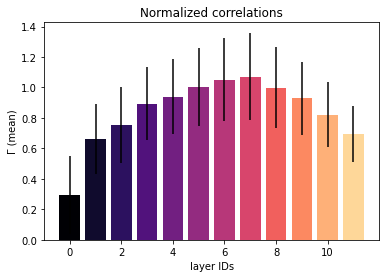

In [14]:
column = 'normalized_test_cc'
mean, std = corr_obj.summarize(session=session,
                        threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 1.0])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title("Normalized correlations")
# plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_normalized.svg'))
# saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'correlations_plot_normalized.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

In [11]:
corr_obj.data.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.007541,500.0,2.141444
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.093085,500.0,1.322590
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.064035,500.0,1.950964
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.032557,500.0,1.064028
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.006368,500.0,1.954458
